In [5]:
! pip install seaborn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from LearningAlgorithms import ClassificationAlgorithms
import seaborn as sns
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [6]:
# Plot settings
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

In [ ]:
# Create a training and test set

In [13]:
df=pd.read_pickle(r"C:\\data science\data-science-template-main\data\interim\03_feature_engineered_dataset.pkl")

# creating a test and training set


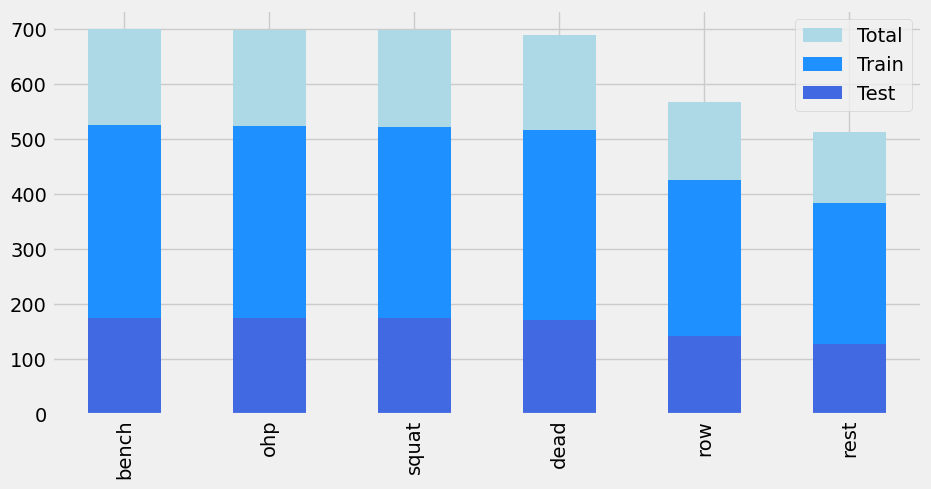

In [17]:

# 1. Drop non-predictive columns
df_train = df.drop(["participant", "category", "set"], axis=1)

# 2. Separate features (X) and target label (y)
X = df_train.drop("label", axis=1)
y = df_train["label"]

# 3. Create the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)


# 1. Create the split (Now with Stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 2. Visualize the distribution of labels
fig, ax = plt.subplots(figsize=(10, 5))

df_train["label"].value_counts().plot(
    kind="bar", ax=ax, color="lightblue", label="Total"
)

y_train.value_counts().plot(kind="bar", ax=ax, color="dodgerblue", label="Train")
y_test.value_counts().plot(kind="bar", ax=ax, color="royalblue", label="Test")

plt.legend()
plt.show()

In [18]:
# --- Split feature subsets ---

basic_features = ["acc_x", "acc_y", "acc_z", "gyr_x", "gyr_y", "gyr_z"]
square_features = ["acc_r", "gyr_r"]
pca_features = ["pca_1", "pca_2", "pca_3"]
time_features = [f for f in df_train.columns if "_temp_" in f]
freq_features = [f for f in df_train.columns if (("_freq" in f) or ("_pse" in f))]
cluster_features = ["cluster"]

print("Basic features:", len(basic_features))
print("Square features:", len(square_features))
print("PCA features:", len(pca_features))
print("Time features:", len(time_features))
print("Frequency features:", len(freq_features))
print("Cluster features:", len(cluster_features))

feature_set_1 = list(set(basic_features))
feature_set_2 = list(set(basic_features + square_features + pca_features))
feature_set_3 = list(set(feature_set_2 + time_features))
feature_set_4 = list(set(feature_set_3 + freq_features + cluster_features))

Basic features: 6
Square features: 2
PCA features: 3
Time features: 16
Frequency features: 88
Cluster features: 1


0
1
2
3
4
5
6
7
8
9


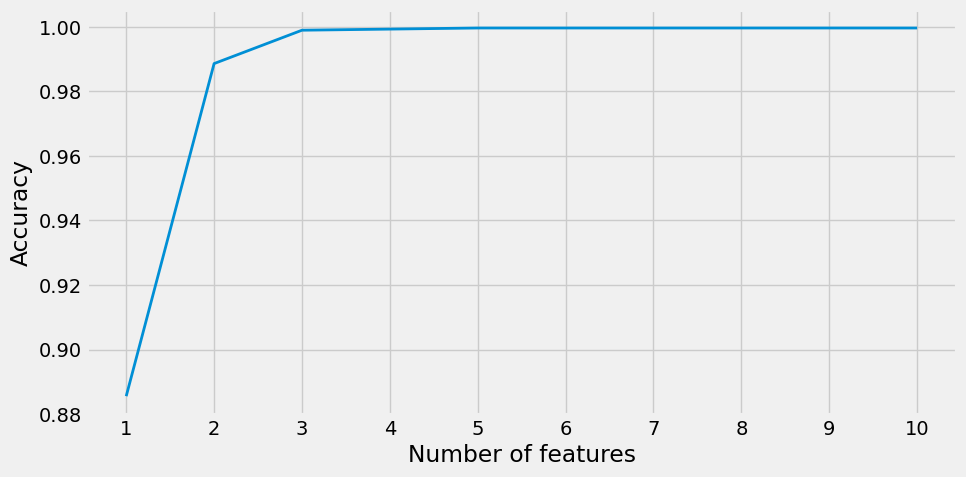

In [19]:


# 1. Initialize the custom learner class
learner = ClassificationAlgorithms()

# 2. Run the Forward Selection
max_features = 10
selected_features, ordered_features, ordered_scores = learner.forward_selection(
    max_features, X_train, y_train
)

# 3. (Optional) Hardcode the results to save time later
# These are the specific features the instructor found to be best in his run.
selected_features = [
    "acc_z_freq_0.0_Hz_ws_14",
    "acc_x_freq_0.0_Hz_ws_14",
    "gyr_r_pse",
    "acc_y_freq_0.0_Hz_ws_14",
    "gyr_z_freq_0.714_Hz_ws_14",
    "gyr_r_freq_1.071_Hz_ws_14",
    "gyr_z_freq_0.357_Hz_ws_14",
    "gyr_x_freq_1.071_Hz_ws_14",
    "acc_x_max_freq",
    "gyr_z_max_freq",
]

# 4. Plot the accuracy progression
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, max_features + 1, 1), ordered_scores)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1, max_features + 1, 1))
plt.show()

In [15]:

# Split feature subsets
# --------------------------------------------------------------


# --------------------------------------------------------------
# Perform forward feature selection using simple decision tree
# --------------------------------------------------------------


# --------------------------------------------------------------
# Grid search for best hyperparameters and model selection
# --------------------------------------------------------------


# --------------------------------------------------------------
# Create a grouped bar plot to compare the results
# --------------------------------------------------------------


# --------------------------------------------------------------
# Select best model and evaluate results
# --------------------------------------------------------------


# --------------------------------------------------------------
# Select train and test data based on participant
# --------------------------------------------------------------


# --------------------------------------------------------------
# Use best model again and evaluate results
# --------------------------------------------------------------


# --------------------------------------------------------------
# Try a simpler model with the selected features
# --------------------------------------------------------------
